# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#import necessary libraries

In [101]:
df_fd = pd.read_csv(r'C:\Users\boudl\Firearm Education Project\02 Data\Prepared Data\firearmspivot.csv')
#import firearms dataset

In [8]:
df_cen = pd.read_csv(r'C:\Users\boudl\Firearm Education Project\02 Data\Prepared Data\census_data.csv')
#import census dataset

# Step 1: Merging Data

In [5]:
pd.set_option('display.max_columns', None)
#increase size of displayable columns

In [9]:
df_fd.head(2)
#display first two rows of firearms dataset

,State,F Year,f Gender,ICD-10 113 Cause List,F Under 5 years,F 5-9 years,F 10-14 years,F 15-19 years,F 20-24 years,F 25-29 years,F 30-34 years,F 35-39 years,F 40-44 years,F 45-49 years,F 50-54 years,F 55-59 years,F 60-64 years,F 65-69 years,F 70-74 years,F 75-79 years,F 80-84 years,F 85years and older,F Not Stated
0,Alabama,2009,Female,Accidental Discharge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alabama,2009,Female,Homicide,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_fd.shape
#define shape of firearms dataset

(2754, 23)

In [10]:
df_cen.head(2)
#display first two rows of census dataset

,C County,State,C Year,C Total population,C Male Total population,C Female Total population,C Under 5 years,C 5 to 9 years,C 10 to 14 years,C 15 to 19 years,C 20 to 24 years,C 25 to 29 years,C 30 to 34 years,C 35 to 39 years,C 40 to 44 years,C 45 to 49 years,C 50 to 54 years,C 55 to 59 years,C 60 to 64 years,C 65 to 69 years,C 70 to 74 years,C 75 to 79 years,C 80 to 84 years,C 85 years and over
0,Autauga County,Alabama,2009,49584,24057,25527,3421.296,3570.048,4412.976,4016.304,2727.120,2875.872,3024.624,3520.464,4363.392,3966.720,3222.960,2627.952,2429.616,1983.36,1437.936,892.512,644.592,495.840
1,Baldwin County,Alabama,2009,171997,84263,87734,10663.814,10663.814,11695.796,11007.808,9459.835,9803.829,9631.832,10835.811,12383.784,13071.772,12211.787,11179.805,10663.814,8599.85,7223.874,5847.898,3955.931,2923.949


Since census data is broken down by county and state per year, it needs to be aggregated to state and year totals to match the inputs of the firearm data before merging

In [21]:
df_cen.shape
#define shape of census dataset

(28985, 24)

In [35]:
aggregated_cen_df = df_cen.drop(columns='C County').groupby(['State', 'C Year'], as_index=False).sum()
#aggregate state and year of census dataset excluding the county column

In [36]:
df_fd['F Year'] = df_fd['F Year'].astype(int)
#change year to integer

In [102]:
df_merge = pd.merge(df_fd, aggregated_cen_df, left_on=['State', 'F Year'], right_on=['State', 'C Year'], how='inner')
#merge firearms and census dataset

In [43]:
df_merge = df_merge.drop(columns='C Year')
#drop duplicate year column from c census dataset

In [44]:
print(df_merge.shape)
#display merged dataframe shape

(2754, 44)


In [45]:
df_merge.head(2)
#display first two rows of merged dataframe

,State,F Year,f Gender,ICD-10 113 Cause List,F Under 5 years,F 5-9 years,F 10-14 years,F 15-19 years,F 20-24 years,F 25-29 years,F 30-34 years,F 35-39 years,F 40-44 years,F 45-49 years,F 50-54 years,F 55-59 years,F 60-64 years,F 65-69 years,F 70-74 years,F 75-79 years,F 80-84 years,F 85years and older,F Not Stated,C Total population,C Male Total population,C Female Total population,C Under 5 years,C 5 to 9 years,C 10 to 14 years,C 15 to 19 years,C 20 to 24 years,C 25 to 29 years,C 30 to 34 years,C 35 to 39 years,C 40 to 44 years,C 45 to 49 years,C 50 to 54 years,C 55 to 59 years,C 60 to 64 years,C 65 to 69 years,C 70 to 74 years,C 75 to 79 years,C 80 to 84 years,C 85 years and over
0,Alabama,2009,Female,Accidental Discharge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4713550,2283346,2430204,313461.973,310970.85,319278.772,333781.331,332607.254,318211.173,294550.306,309873.146,332490.547,348408.373,329415.067,291451.348,243428.641,188864.463,152783.538,125535.068,91576.611,77806.246
1,Alabama,2009,Female,Homicide,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4713550,2283346,2430204,313461.973,310970.85,319278.772,333781.331,332607.254,318211.173,294550.306,309873.146,332490.547,348408.373,329415.067,291451.348,243428.641,188864.463,152783.538,125535.068,91576.611,77806.246


In [47]:
df_merge.isnull().sum()
#determine any missing values post merge

State                        0
F Year                       0
f Gender                     0
ICD-10 113 Cause List        0
F Under 5 years              0
F 5-9 years                  0
F 10-14 years                0
F 15-19 years                0
F 20-24 years                0
F 25-29 years                0
F 30-34 years                0
F 35-39 years                0
F 40-44 years                0
F 45-49 years                0
F 50-54 years                0
F 55-59 years                0
F 60-64 years                0
F 65-69 years                0
F 70-74 years                0
F 75-79 years                0
F 80-84 years                0
F 85years and older          0
F Not Stated                 0
C Total population           0
C Male Total population      0
C Female Total population    0
C Under 5 years              0
C 5 to 9 years               0
C 10 to 14 years             0
C 15 to 19 years             0
C 20 to 24 years             0
C 25 to 29 years             0
C 30 to 

In [48]:
df_merge.dtypes
#display dtypes of merged datafram

State                         object
F Year                         int32
f Gender                      object
ICD-10 113 Cause List         object
F Under 5 years                int64
F 5-9 years                    int64
F 10-14 years                  int64
F 15-19 years                  int64
F 20-24 years                  int64
F 25-29 years                  int64
F 30-34 years                  int64
F 35-39 years                  int64
F 40-44 years                  int64
F 45-49 years                  int64
F 50-54 years                  int64
F 55-59 years                  int64
F 60-64 years                  int64
F 65-69 years                  int64
F 70-74 years                  int64
F 75-79 years                  int64
F 80-84 years                  int64
F 85years and older            int64
F Not Stated                   int64
C Total population             int64
C Male Total population        int64
C Female Total population      int64
C Under 5 years              float64
C

In [54]:
float_cols = df_merge.select_dtypes(include=['float64']).columns
#select all float columns in dataframe

In [55]:
df_merge[float_cols] = np.ceil(df_merge[float_cols]).astype('int64')
#round up all values to nearest whole number and change column to integers

In [56]:
df_merge.dtypes
#display dtypes of merged datafram

State                        object
F Year                        int32
f Gender                     object
ICD-10 113 Cause List        object
F Under 5 years               int64
F 5-9 years                   int64
F 10-14 years                 int64
F 15-19 years                 int64
F 20-24 years                 int64
F 25-29 years                 int64
F 30-34 years                 int64
F 35-39 years                 int64
F 40-44 years                 int64
F 45-49 years                 int64
F 50-54 years                 int64
F 55-59 years                 int64
F 60-64 years                 int64
F 65-69 years                 int64
F 70-74 years                 int64
F 75-79 years                 int64
F 80-84 years                 int64
F 85years and older           int64
F Not Stated                  int64
C Total population            int64
C Male Total population       int64
C Female Total population     int64
C Under 5 years               int64
C 5 to 9 years              

# Step 2: Visualizations

## Visual 1 Heat Map

The following heat maps will display the total deaths of all categories (accidental discharge, homicide, suicide) in relationship to the total populations. There are two maps to compare changes over a five year period: 2012 and 2017

In [65]:
death_columns = [col for col in df_merge.columns if col.startswith('F ') and col != 'F Not Stated']
#sum all daeth columns

In [66]:
df_merge['Total Deaths'] = df_merge[death_columns].sum(axis=1)
#sum all death columns

In [67]:
df_2012 = df_merge[df_merge['F Year'] == 2012]
df_2017 = df_merge[df_merge['F Year'] == 2017]
#filter data

In [68]:
corr_2012 = df_2012[['Total Deaths', 'C Total population']].corr()
corr_2017 = df_2017[['Total Deaths', 'C Total population']].corr()
#create correlation matrices

Text(0.5, 1.0, '2012 Correlation Heatmap')

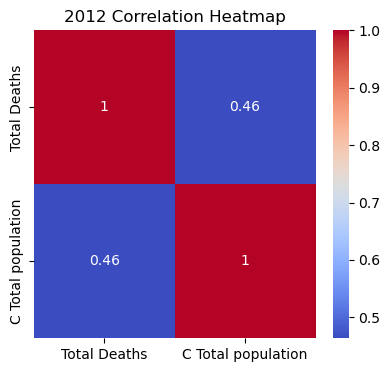

In [69]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(corr_2012, annot=True, cmap='coolwarm')
plt.title('2012 Correlation Heatmap')
#create heatmap for 2012

The correlation coefficient of 0.46 suggest a moderately positive relation between the size of the population and the number of firearm-related deaths in all categories. However, this number is not close to one suggesting other factors could influencing the number of deaths.

Text(0.5, 1.0, '2017 Correlation Heatmap')

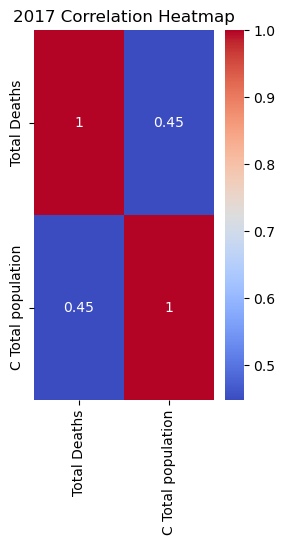

In [70]:
plt.subplot(1, 2, 2)
sns.heatmap(corr_2017, annot=True, cmap='coolwarm')
plt.title('2017 Correlation Heatmap')
#create heatmap for 2017

Similar to the study in 2012, the correlation coefficient of 0.46 suggest a moderately positive relation between the size of the total population and the number of firearm-related deaths in all categories. However, this number is not close to one suggesting other factors could influencing the number of deaths. This suggests as well that over time, while a population might increase, the number of deaths relating to firearms does not follow.

## Visual 2 Scatterplots

The following scatterplots will allow a better visualization to display the total population in relationship to each type of firearm related incident in 2012 and 2017. 

In [103]:
categories = ['Homicide', 'Suicide', 'Accidental Discharge']
years = [2012, 2017]
#define categories and years of study

In [104]:
death_columns = [
    'F Under 5 years', 'F 5-9 years', 'F 10-14 years', 'F 15-19 years', 
    'F 20-24 years', 'F 25-29 years', 'F 30-34 years', 'F 35-39 years', 
    'F 40-44 years', 'F 45-49 years', 'F 50-54 years', 'F 55-59 years', 
    'F 60-64 years', 'F 65-69 years', 'F 70-74 years', 'F 75-79 years', 
    'F 80-84 years', 'F 85years and older']
df_merge['Total Deaths'] = df_merge[death_columns].sum(axis=1)
#sum death columns for each record

In [105]:
scatter_data = pd.DataFrame()
#create empty dataframe for scatterplot data

In [106]:
for year in years:
    for category in categories:
        df_temp = df_merge[(df_merge['F Year'] == year) & 
                           (df_merge['ICD-10 113 Cause List'].str.contains(category, case=False))]
        df_temp['Category'] = category.capitalize()
        scatter_data = pd.concat([scatter_data, df_temp])
#define filters and categories

C:\Users\boudl\AppData\Local\Temp\ipykernel_2628\414740227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Category'] = category.capitalize()
C:\Users\boudl\AppData\Local\Temp\ipykernel_2628\414740227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Category'] = category.capitalize()
C:\Users\boudl\AppData\Local\Temp\ipykernel_2628\414740227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

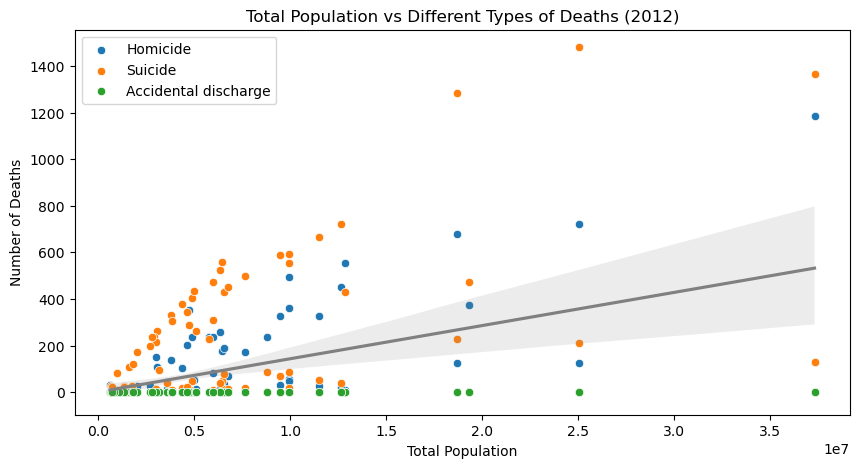

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

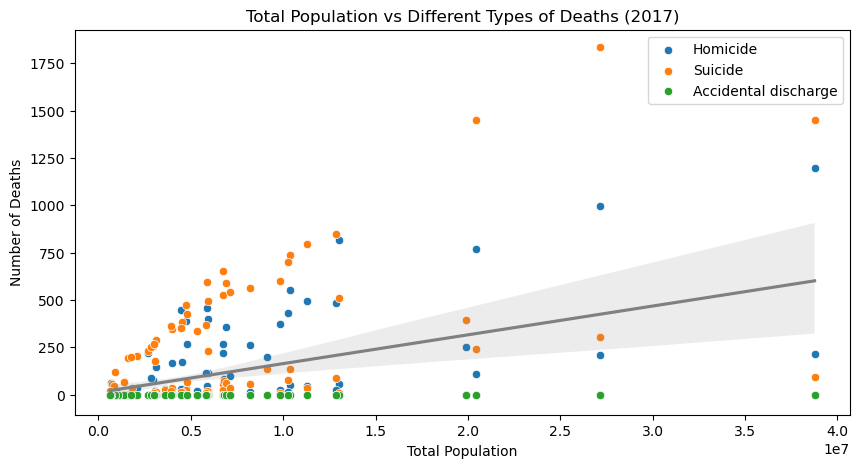

In [112]:
for year in years:
    plt.figure(figsize=(10, 5))
    for category in categories:
        # Filter data by year and category
        df_year_category = df_merge[(df_merge['F Year'] == year) &
                                    (df_merge['ICD-10 113 Cause List'].str.contains(category, case=False))]
        # Add scatterplot for each category
        sns.scatterplot(x='C Total population', y='Total Deaths', data=df_year_category, label=category.capitalize())

    # Add a trend line using regplot
    sns.regplot(x='C Total population', y='Total Deaths', data=df_merge[df_merge['F Year'] == year], 
                scatter=False, color='gray')

    plt.title(f'Total Population vs Different Types of Deaths ({year})')
    plt.xlabel('Total Population')
    plt.ylabel('Number of Deaths')
    plt.legend()

    # Save the plot for each year
    filename = rf'C:\Users\boudl\Firearm Education Project\04 Analysis\Visualizations\scatterplot_{year}.png'
    plt.savefig(filename)
    plt.show()
#create scatterplots for 2012 and 2017

The scatterplots for 2012 and 2017 are very similar in their outputs, including the outliers. Both scatterplots suggest that there is a higher concentration of suicide related firearm deaths than homicide, with accidental discharge being the least common cause of death. It also appears that both had visually the same amount of deaths in 2012 and 2017 even though there was a larger population in 2017

## Visual 3: Pair Plot

This pair plot will allow a better visualization to the relationship between deaths reported in each age group and how they relate to the total population for 2012 and 2017.

In [118]:
categories = ['homicide', 'suicide', 'accidental discharge']
#define categories

In [119]:
pair_plot_data = pd.DataFrame()
#create emppty dataframe for pair plot

In [120]:
for year in [2012, 2017]:
    for category in categories:
        df_temp = df_merge[(df_merge['F Year'] == year) &
                           (df_merge['ICD-10 113 Cause List'].str.contains(category, case=False))]
        df_temp = df_temp.groupby('State').agg({'Total Deaths': 'sum', 'C Total population': 'mean'}).reset_index()
        df_temp['Category'] = category
        df_temp['Year'] = year
        pair_plot_data = pd.concat([pair_plot_data, df_temp])
#filter by year and category

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

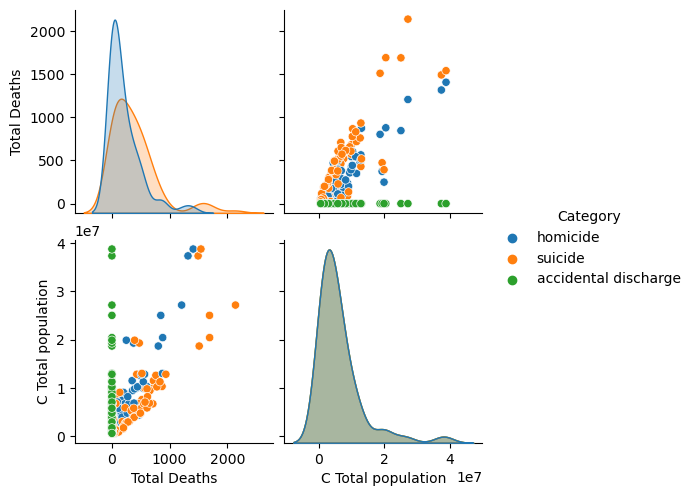

In [121]:
sns.pairplot(pair_plot_data, hue='Category', vars=['Total Deaths', 'C Total population'], diag_kind='kde')
plt.show()
#create and display pair plot

This pair plot suggests that there is a higher frequency of homicides reported rather than suicides, with no remarkable reports for accidental discharge when compared to the total population (top left). There is still a positive trend upward of suicide and homicide reports than reports for accidental discharge (top right). Similar to the other scatterplot, the bottom left scatterplot suggests there is not enough reports of deaths by accidental discharge to relate to the total population to be a remarkable add to the study, however, a persistent trend of death reports in homcidie and suicide when compared to the total population are (bottom left). The bottom right chart is not able to be interpreted due to color wash and/or plauseability of data disruption/bias/significance.

## Visual 4 Categorical Plot

Due to the complexity and size of the merged dataset, this categorical plot will not be of the whole dataset, but rather continuing the trend of studying total deaths to total populations in 2012 and 2017.

In [122]:
plot_data = pd.DataFrame()
#prepare data

In [123]:
for year in [2012, 2017]:
    for category in categories:
        # Filter the data by year and category
        df_temp = df_merge[(df_merge['F Year'] == year) &
                           (df_merge['ICD-10 113 Cause List'].str.contains(category, case=False))]
        
        # Aggregate data
        df_temp_agg = df_temp.groupby('State').agg({'Total Deaths': 'sum', 'C Total population': 'mean'}).reset_index()
        df_temp_agg['Year'] = year
        df_temp_agg['Category'] = category

        plot_data = pd.concat([plot_data, df_temp_agg])
#filter and aggregate data for visualization

C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boudl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

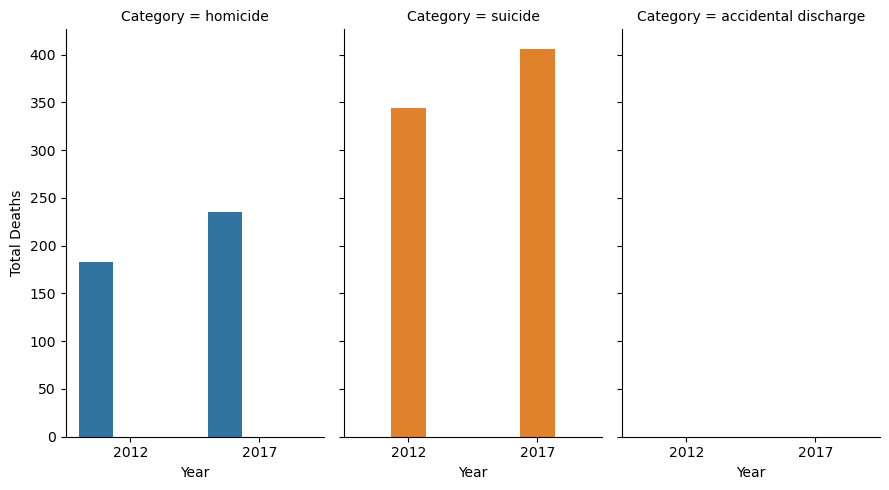

In [124]:
sns.catplot(x='Year', y='Total Deaths', hue='Category', col='Category', data=plot_data, kind='bar', ci=None, aspect=0.6)
#create categorical plot

For the years of 2012 and 2017, there was increase in both homicides and suicides but no reports of deaths by accidental discharge of a firearm. This information also shows that for both 2012 and 2017, there were more suicides than homicides. This information will need to be further studied into age groups, genders, and states to best understand these numbers.

# Export Data

In [125]:
path = r'C:\Users\boudl\Firearm Education Project'
#define path for export

In [126]:
df_merge.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'firearmcensus_merge.csv'))
#export merged dataframe